In [87]:
# 1. Install the yfinance library
# pip install yfinance

import yfinance as yf
import pandas as pd

# 2. Define the ticker and date range
ticker = "AAPL"  # Replace with any stock symbol, e.g., "MSFT", "GOOGL"
start_date = "2010-01-01"
end_date = "2025-08-20"

# 3. Download historical data
df = yf.download(ticker, start=start_date, end=end_date)

# 4. Inspect the data
print(df.head())  # Columns: Open, High, Low, Close, Adj Close, Volume

# 5. Save to CSV
csv_filename = f"{ticker}.csv"
df.to_csv(csv_filename)

print(f"✅ Saved historical data to {csv_filename}")


/tmp/ipython-input-834272284.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.424606  6.439316  6.375674  6.407195  493729600
2010-01-05  6.435713  6.472037  6.401790  6.442317  601904800
2010-01-06  6.333344  6.461230  6.326740  6.435713  552160000
2010-01-07  6.321637  6.364266  6.275706  6.356761  477131200
2010-01-08  6.363665  6.364266  6.276007  6.313231  447610800
✅ Saved historical data to AAPL.csv


In [88]:
# Remove erroneous code since 'Price' column does not exist
df = pd.DataFrame(df)
# Display the modified DataFrame
display(df.head())

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.424606,6.439316,6.375674,6.407195,493729600
2010-01-05,6.435713,6.472037,6.401790,6.442317,601904800
2010-01-06,6.333344,6.461230,6.326740,6.435713,552160000
2010-01-07,6.321637,6.364266,6.275706,6.356761,477131200
2010-01-08,6.363665,6.364266,6.276007,6.313231,447610800


In [89]:

df.columns = df.columns.droplevel(1)
display(df.head())

Price,Close,High,Low,Open,Volume
Date,,,,,
2010-01-04,6.424606,6.439316,6.375674,6.407195,493729600
2010-01-05,6.435713,6.472037,6.401790,6.442317,601904800
2010-01-06,6.333344,6.461230,6.326740,6.435713,552160000
2010-01-07,6.321637,6.364266,6.275706,6.356761,477131200
2010-01-08,6.363665,6.364266,6.276007,6.313231,447610800


In [90]:
df = df.reset_index()
df = df.rename(columns={'Date': 'Date', 'Price': 'Original_Price'})
display(df.head())

Price,Date,Close,High,Low,Open,Volume
0,2010-01-04,6.424606,6.439316,6.375674,6.407195,493729600
1,2010-01-05,6.435713,6.472037,6.401790,6.442317,601904800
2,2010-01-06,6.333344,6.461230,6.326740,6.435713,552160000
3,2010-01-07,6.321637,6.364266,6.275706,6.356761,477131200
4,2010-01-08,6.363665,6.364266,6.276007,6.313231,447610800


In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# -------------------------------
# 1. Load Dataset
# -------------------------------
  # Replace with your stock dataset
df['Date'] = pd.to_datetime(df['Date'])
df = df[['Close']]

In [92]:
# -------------------------------
# 2. Data Preprocessing
# -------------------------------
data = df[['Close']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [93]:
SEQ_LEN = 60  # Past 60 days

def create_sequences(data, seq_length=SEQ_LEN):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, SEQ_LEN)

In [94]:
# Train-test split (80-20)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [95]:
# -------------------------------
# 3. Build LSTM Model
# -------------------------------
model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(SEQ_LEN, 1)),
    Dropout(0.2),
    LSTM(100),
    Dropout(0.2),
    Dense(1)  # Predict next closing price
])

model.compile(optimizer="adam", loss="mse", metrics=["mae"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [96]:
# -------------------------------
# 4. Train Model
# -------------------------------
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 124ms/step - loss: 0.0067 - mae: 0.0420 - val_loss: 8.4033e-04 - val_mae: 0.0229
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 107ms/step - loss: 3.3765e-04 - mae: 0.0110 - val_loss: 0.0012 - val_mae: 0.0281
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step - loss: 3.9551e-04 - mae: 0.0115 - val_loss: 0.0011 - val_mae: 0.0268
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - loss: 4.8009e-04 - mae: 0.0134 - val_loss: 8.4587e-04 - val_mae: 0.0225
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - loss: 3.3328e-04 - mae: 0.0112 - val_loss: 7.4041e-04 - val_mae: 0.0209
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - loss: 3.2159e-04 - mae: 0.0102 - val_loss: 0.0015 - val_mae: 0.0322
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - loss: 3.0151e-04 - mae: 0.0101 - val_loss: 6.7998e-04 - val_mae: 0.0202
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - loss: 2.7530e-04 - mae: 0.0095 - val_loss: 7.6884e-04 - val_mae: 0.0212
Ep

In [97]:
# 5. Predictions
# -------------------------------
y_pred = model.predict(X_test)

# Inverse scaling
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


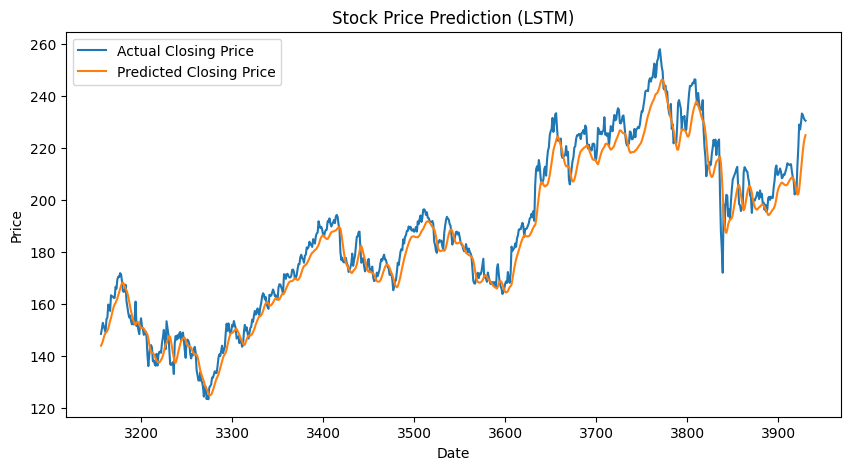

In [98]:
# 6. Visualization
# -------------------------------
plt.figure(figsize=(10, 5))
plt.plot(df.index[-len(y_test):], y_test_inv, label="Actual Closing Price")
plt.plot(df.index[-len(y_test):], y_pred_inv, label="Predicted Closing Price")
plt.title("Stock Price Prediction (LSTM)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [99]:
# -------------------------------
# 7. Predict Next 10 Days
# -------------------------------
last_60_days = scaled_data[-SEQ_LEN:]   # last 60 days from dataset
current_input = last_60_days.reshape(1, SEQ_LEN, 1)

future_predictions = []

for _ in range(10):  # predict next 10 days
    next_pred = model.predict(current_input, verbose=0)
    future_predictions.append(next_pred[0, 0])
    # slide window: remove first day, append prediction
    current_input = np.append(current_input[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1) # Reshape next_pred to match dimensions




In [100]:
# Inverse scaling to get actual prices
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))



In [101]:
future_predictions

array([[225.52055],
       [224.9653 ],
       [223.90091],
       [222.57393],
       [221.12753],
       [219.64098],
       [218.15724],
       [216.69846],
       [215.27531],
       [213.89226]], dtype=float32)

In [103]:
# -------------------------------
# 9. Save Model
# -------------------------------
model.save("stock_prediction_lstm_model.keras")
print("✅ Model saved successfully.")

from google.colab import files

files.download("stock_prediction_lstm_model.keras")

✅ Model saved successfully.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>